In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
import matplotlib.pyplot as plt

---

## Data Preprocessing



### Step 1: Read the `loan.csv` data into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = '/Users/celinakamler/ucb/homework/Project-4/Finance_loan_approval_prediction_data/loan.csv'
loan_data = pd.read_csv(file_path)

# Review the DataFrame
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Preprocessing data
# Drop Loan_ID
loan_data_df = loan_data.drop(['Loan_ID'], axis =1)

In [4]:
#Impute missing values for continuous data only (LoanAmount, Loan_Amount_Term)
continuous_columns = ['LoanAmount', 'Loan_Amount_Term']

# Initialize the KNNImputer
imputer = SimpleImputer(strategy='mean')

# Apply the KNN imputer to the relevant columns
loan_data_df[continuous_columns] = imputer.fit_transform(loan_data_df[continuous_columns])

# Check the results
print(loan_data_df[continuous_columns].head())

   LoanAmount  Loan_Amount_Term
0  146.412162             360.0
1  128.000000             360.0
2   66.000000             360.0
3  120.000000             360.0
4  141.000000             360.0


In [28]:
# Drop missing values
loan_data_df.dropna()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360,1.0,Urban,Y


In [29]:
#Check datatypes for all variables
loan_data_df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount            object
Loan_Amount_Term       int64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [30]:
# Determine the number of unique values in each column
loan_data_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [31]:
# # For columns with more than 10 unique values use pd.cut to create bins, statring with ApplicantIncome, CoapplicantIncome, and Loan_Amount_Term
# # Manually define unique bin edges
# applicant_income_bins = [0, 1000, 2000, 3000, 4000, 5000, np.inf]  # Define edges for ApplicantIncome
# coapplicant_income_bins = [-np.inf, 0, 1000, 3000, 5000, np.inf]  # Define edges for CoapplicantIncome including zero

# # Apply pd.cut with manually defined bin edges
# loan_data_df['ApplicantIncome_bins'] = pd.cut(loan_data_df['ApplicantIncome'], bins=applicant_income_bins, labels=False)
# loan_data_df['CoapplicantIncome_bins'] = pd.cut(loan_data_df['CoapplicantIncome'], bins=coapplicant_income_bins, labels=False)

# loan_data_df

In [32]:
# # Use more bins for 'LoanAmount' to allow for a more complex model
# num_bins = 10

# # Create bins using pd.cut for fixed-width bins
# loan_data_df['LoanAmount_bins'] = pd.cut(loan_data_df['LoanAmount'], bins=num_bins, labels=False)

In [35]:
# Convert Loan_Amount_Term to integer
loan_data_df['Loan_Amount_Term'] = loan_data_df['Loan_Amount_Term'].astype(int)

# Convert 'LoanAmount' to numeric type (float)
loan_data_df['LoanAmount'] = pd.to_numeric(loan_data_df['LoanAmount'], errors='coerce')

# Apply formatting to 'LoanAmount' with two decimal places
loan_data_df['LoanAmount'] = loan_data_df['LoanAmount'].map("{:.2f}".format)

#Check dataFrame before export
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360,1.0,Urban,Y


In [43]:
import numpy as np

# Convert blanks to NaN
loan_data_df['Dependents'].replace(['', ' '], np.nan, inplace=True)

# Drop rows where 'dependents' column has NaN values
loan_data_df.dropna(subset=['Dependents'], inplace=True)

#Check dataFrame before export
loan_data_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.41,360,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.00,360,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.00,360,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.00,360,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.00,360,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.00,360,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.00,180,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.00,360,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.00,360,1.0,Urban,Y


In [44]:
#Export the DataFrame to a csv
loan_data_df.to_csv('clean_loan_data.csv')

In [37]:
# Check the number of unique values in each column
loan_data_df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
# # Ensure binned columns are treated as categorical
# loan_data_df['ApplicantIncome_bins'] = loan_data_df['ApplicantIncome_bins'].astype('category')
# loan_data_df['CoapplicantIncome_bins'] = loan_data_df['CoapplicantIncome_bins'].astype('category')

# # Check the data types to confirm
# print(loan_data_df[['ApplicantIncome_bins', 'CoapplicantIncome_bins']].dtypes)

In [14]:
# # Plot histogram of 'ApplicantIncome'
# plt.figure(figsize=(10, 6))
# plt.hist(loan_data_df['ApplicantIncome'], bins= applicant_income_bins, edgecolor='black')  # Adjust bins as needed
# plt.xlabel('Applicant Income')
# plt.ylabel('Frequency')
# plt.title('Histogram of Applicant Income')
# plt.grid(True)
# plt.show()

In [15]:
# Change all categorical columns to binary using get dummies
cat_loan_df = pd.get_dummies(loan_data_df, columns=['Gender','Married','Dependents','Education',
                                                    'Self_Employed', 'Loan_Amount_Term','Credit_History','Property_Area'])

In [16]:
# Separate the target column 'Loan_Status'
y = cat_loan_df.Loan_Status.values

# Drop the target column 'Loan_Status' from the features data
X = cat_loan_df.drop(columns="Loan_Status").values

# Check the results
cat_loan_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,...,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_342,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.41,Y,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True
1,4583,1508.0,128.00,N,False,True,False,True,False,True,...,False,False,False,True,False,False,True,True,False,False
2,3000,0.0,66.00,Y,False,True,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.00,Y,False,True,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True
4,6000,0.0,141.00,Y,False,True,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True


## Random Forest Model

In [17]:
# Define features set
X = cat_loan_df.copy()
X.drop("Loan_Status", axis=1, inplace=True)
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,...,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_342,Loan_Amount_Term_360,Loan_Amount_Term_480,Credit_History_0.0,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.41,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True
1,4583,1508.0,128.00,False,True,False,True,False,True,False,...,False,False,False,True,False,False,True,True,False,False
2,3000,0.0,66.00,False,True,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.00,False,True,False,True,True,False,False,...,False,False,False,True,False,False,True,False,False,True
4,6000,0.0,141.00,False,True,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True


In [18]:
# Define target vector
y = cat_loan_df["Loan_Status"].ravel()
y[:5]

array(['Y', 'N', 'Y', 'Y', 'Y'], dtype=object)

In [19]:
# Fit the Random Forest Model

# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

# Scaling data
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [20]:
# Make predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [21]:
# Evaluate the model

# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculate the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [22]:
# Display results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,24,24
Actual 1,6,100


Accuracy Score : 0.8051948051948052
Classification Report
              precision    recall  f1-score   support

           N       0.80      0.50      0.62        48
           Y       0.81      0.94      0.87       106

    accuracy                           0.81       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.80      0.81      0.79       154



In [23]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.17454117969149574, 'ApplicantIncome'),
 (0.16870307530763562, 'Credit_History_0.0'),
 (0.16691313365243163, 'LoanAmount'),
 (0.1041406293835566, 'CoapplicantIncome'),
 (0.09339860734940678, 'Credit_History_1.0'),
 (0.021698439931821103, 'Property_Area_Semiurban'),
 (0.02099315447250392, 'Property_Area_Rural'),
 (0.020223343471167436, 'Dependents_0'),
 (0.018817365041658898, 'Self_Employed_No'),
 (0.018785758962883287, 'Dependents_1'),
 (0.017448208440921823, 'Property_Area_Urban'),
 (0.015717778868618436, 'Education_Not Graduate'),
 (0.01542017990722374, 'Married_No'),
 (0.01539137017152385, 'Education_Graduate'),
 (0.014943450014586114, 'Married_Yes'),
 (0.01443523241187375, 'Gender_Male'),
 (0.01384330391878157, 'Dependents_2'),
 (0.013502714403301534, 'Self_Employed_Yes'),
 (0.013303305915020255, 'Dependents_3+'),
 (0.013239862754431501, 'Loan_Amount_Term_360'),
 (0.012885431064017622, 'Gender_Female'),
 (0.010028266859141904, 'Loan_Amount_Term_480'),
 (0.008796863469077284, 'Lo

['ApplicantIncome' 'Credit_History_0.0' 'LoanAmount' 'CoapplicantIncome'
 'Credit_History_1.0' 'Property_Area_Semiurban' 'Property_Area_Rural'
 'Dependents_0' 'Self_Employed_No' 'Dependents_1' 'Property_Area_Urban'
 'Education_Not Graduate' 'Married_No' 'Education_Graduate' 'Married_Yes'
 'Gender_Male' 'Dependents_2' 'Self_Employed_Yes' 'Dependents_3+'
 'Loan_Amount_Term_360' 'Gender_Female' 'Loan_Amount_Term_480'
 'Loan_Amount_Term_180' 'Loan_Amount_Term_300' 'Loan_Amount_Term_240'
 'Loan_Amount_Term_342' 'Loan_Amount_Term_60' 'Loan_Amount_Term_84'
 'Loan_Amount_Term_120' 'Loan_Amount_Term_36' 'Loan_Amount_Term_12']


<Figure size 1200x1000 with 0 Axes>

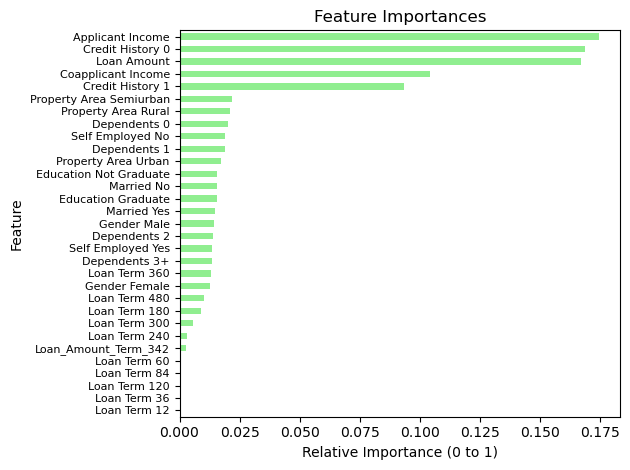

In [27]:
importances = rf_model.feature_importances_
features = X.columns

# We can sort the features by their importance
sorted_importances = sorted(zip(importances, features), reverse=True)

# Create the DataFrame
importances_df = pd.DataFrame(sorted_importances, columns=['Importance', 'Feature'])

# Print unique feature names (for debugging purposes)
print(importances_df['Feature'].unique())

# Create a complete mapping dictionary for all features
feature_name_mapping = {
    'Credit_History_0.0': 'Credit History 0',
    'Credit_History_1.0': 'Credit History 1',
    'ApplicantIncome': 'Applicant Income',
    'LoanAmount': 'Loan Amount',
    'CoapplicantIncome': 'Coapplicant Income',
    'ApplicantIncome_bins': 'Applicant Income Bins',
    'LoanAmount_bins': 'Loan Amount Bins',
    'CoapplicantIncome_bins': 'Coapplicant Income Bins',
    'Property_Area_Semiurban': 'Property Area Semiurban',
    'Property_Area_Rural': 'Property Area Rural',
    'Dependents_0': 'Dependents 0',
    'Property_Area_Urban': 'Property Area Urban',
    'Dependents_1': 'Dependents 1',
    'Self_Employed_No': 'Self Employed No',
    'Education_Graduate': 'Education Graduate',
    'Married_No': 'Married No',
    'Education_Not Graduate': 'Education Not Graduate',
    'Married_Yes': 'Married Yes',
    'Gender_Male': 'Gender Male',
    'Dependents_2': 'Dependents 2',
    'Gender_Female': 'Gender Female',
    'Self_Employed_Yes': 'Self Employed Yes',
    'Loan_Amount_Term_360': 'Loan Term 360',
    'Dependents_3+': 'Dependents 3+',
    'Loan_Amount_Term_180': 'Loan Term 180',
    'Loan_Amount_Term_480': 'Loan Term 480',
    'Loan_Amount_Term_300': 'Loan Term 300',
    'Loan_Amount_Term_240': 'Loan Term 240',
    'Loan_Amount_Term_348': 'Loan Term 348',
    'Loan_Amount_Term_295': 'Loan Term 295',
    'Loan_Amount_Term_84': 'Loan Term 84',
    'Loan_Amount_Term_324': 'Loan Term 324',
    'Loan_Amount_Term_120': 'Loan Term 120',
    'Loan_Amount_Term_60': 'Loan Term 60',
    'Loan_Amount_Term_312': 'Loan Term 312',
    'Loan_Amount_Term_288': 'Loan Term 288',
    'Loan_Amount_Term_384': 'Loan Term 384',
    'Loan_Amount_Term_36': 'Loan Term 36',
    'Loan_Amount_Term_12': 'Loan Term 12'
}

# Replace feature names with cleaned-up names, handle missing keys
importances_df['Feature'] = importances_df['Feature'].map(feature_name_mapping).fillna(importances_df['Feature'])

# Set the cleaned-up feature names as the index
importances_df.set_index('Feature', inplace=True)

# Sort values by importance
importances_sorted = importances_df.sort_values(by='Importance')

# Adjust the figure size
plt.figure(figsize=(12, 10))  # Increase the height to give more space for the y-axis labels

# Plot the bar chart
ax = importances_sorted.plot(kind='barh', color='lightgreen', title='Feature Importances', legend=False)

# Make the font size of the y-axis tick labels smaller
ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)  # Adjust the fontsize as needed

# Label the x-axis
ax.set_xlabel('Relative Importance (0 to 1)')  # Label the x-axis with the appropriate units

# Adjust layout to make room for the labels
plt.tight_layout()

# Save the plot as a JPG file
plt.savefig('feature_importances.jpg')

plt.show()